# Standarization and Normalization

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

In [49]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df2=df[['Survived', 'Pclass', 'Age', 'Parch']]
df2.head()

,Survived,Pclass,Age,Parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [51]:
df3=df2.fillna(df2.mean())

In [52]:
X=df3.drop("Survived", axis=1)
y=df3["Survived"]
print('shape of X = ', X.shape)
print('shape of y = ', y.shape)

shape of X =  (891, 3)
shape of y =  (891,)


# Train and test data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=51)
print('shape of X_tran = ', X_train.shape)
print('shape of y_train = ', y_train.shape)
print('shape of X_test = ', X_test.shape)
print('shape of y_test = ', y_test.shape)

shape of X_tran =  (712, 3)
shape of y_train =  (712,)
shape of X_test =  (179, 3)
shape of y_test =  (179,)


In [55]:
# standarization
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [56]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [57]:
# standar deviation
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [58]:
X_train.describe()

,Pclass,Age,Parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [59]:
# transform x_train and x_test
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [60]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [61]:
X_test_sc

array([[-1.54750023,  0.80404914, -0.49198545],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [ 0.8220055 ,  0.03432278, -0.49198545],
       [-1.54750023,  0.01116307, -0.49198545],
       [-0.36274737,  0.34221332,  0.76354731],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [-1.54750023,  1.34285759, -0.49198545],
       [ 0.8220055 , -1.04329413, -0.49198545],
       [-0.36274737,  2.80533768, -0.49198545],
       [-1.54750023, -1.12026677,  0.76354731],
       [-0.36274737,  0.11129541, -0.49198545],
       [-0.36274737, -0.1196225 , -0.49198545],
       [-1.54750023,  1.18891232, -0.49198545],
       [ 0.8220055 , -0.50448568, -0.49198545],
       [ 0.8220055 ,  0.88102177,  5.78567837],
       [-0.36274737, -0.35054041, -0.49198545],
       [-0.36274737,  0.49615859,  2.01908008],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [-0.36274737, -0.81237622, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.491

In [62]:
X_train_sc=pd.DataFrame(X_train_sc, columns=['Pclass', 'Age', 'Parch'])
X_test_sc=pd.DataFrame(X_test_sc, columns=['Pclass', 'Age', 'Parch'])

In [63]:
X_train_sc.head()

,Pclass,Age,Parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


 # stndarization mean=0, std=1


In [65]:
X_train_sc.describe().round(2)

,Pclass,Age,Parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


# MinMax scaling, normalization


In [82]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [72]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [73]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [74]:
X_train_mmc=pd.DataFrame(X_train_mmc, columns=['Pclass', 'Age', 'Parch'])
X_test_mmc=pd.DataFrame(X_test_mmc, columns=['Pclass', 'Age', 'Parch'])

In [77]:
X_train_mmc.describe().round(2) # Normaization

,Pclass,Age,Parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


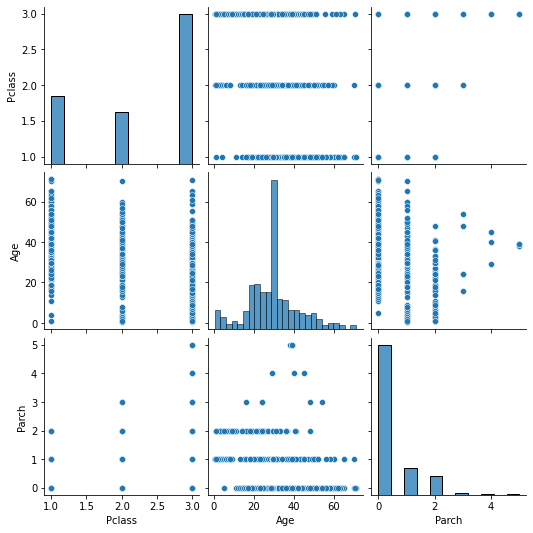

In [79]:
sns.pairplot(X_train)

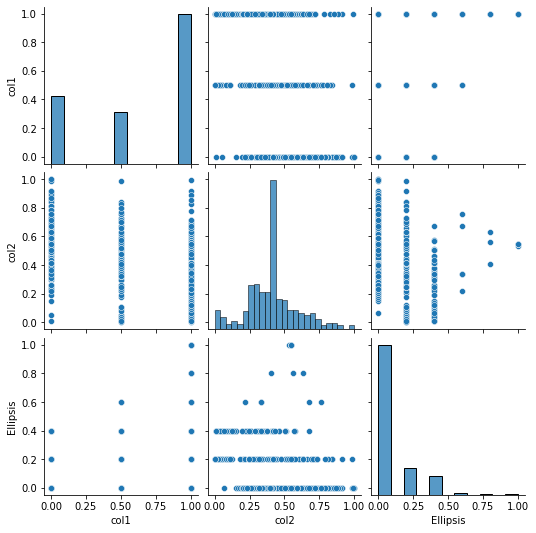

In [89]:
# Convert X_train_sc to DataFrame, replace 'col1', 'col2', etc. with actual column names if you have them
X_train_sc_df = pd.DataFrame(X_train_sc, columns=['col1', 'col2', ...])  # Specify column names here

# Now use sns.pairplot with the DataFrame
sns.pairplot(X_train_sc_df)


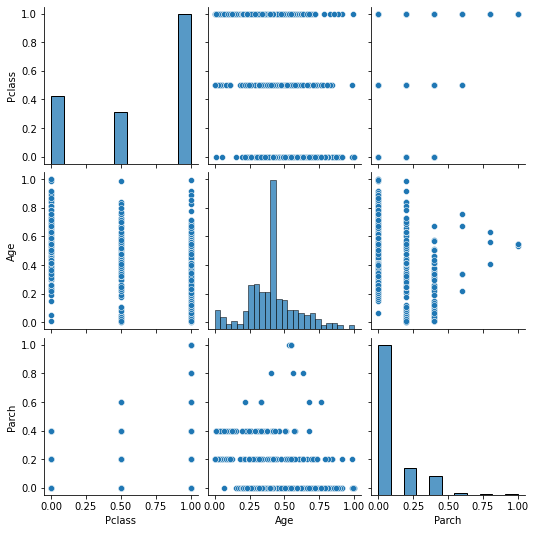

In [81]:
sns.pairplot(X_train_mmc)